### Problem 1
<div style="page-break-after: always;"></div>

The sum of squared error is:  54.69837614640706
b0 is:  16.00321746247377
b1 is:  -5.156846943665577

The sum of squared error using sklearn is:  54.698376146407014
b0 using sklearn is:  16.003217462473785
b1 using sklearn is:  -5.156846943665579


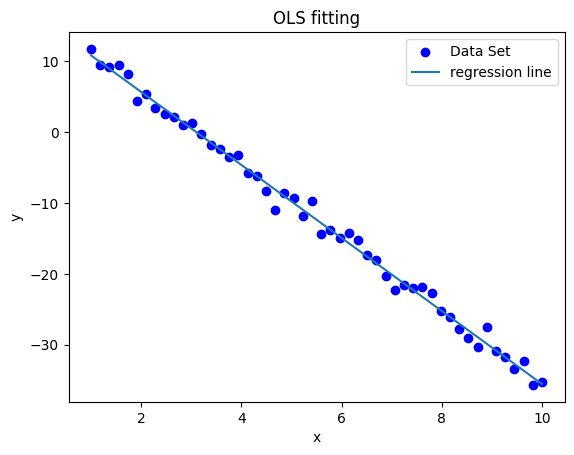

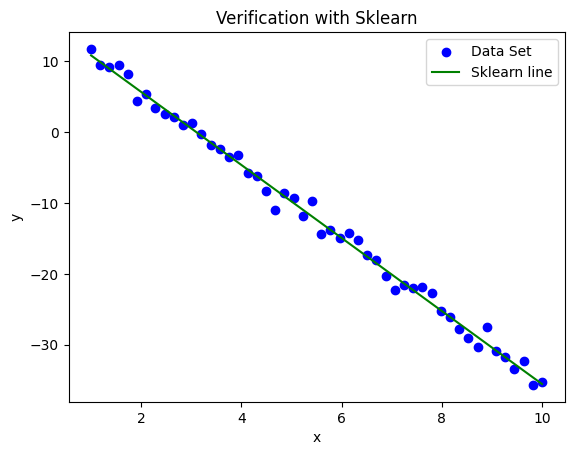

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

# part(b)
n = 50
b0 = 15
b1 = -5
np.random.seed(0)

x = np.linspace(1,10,n)
y = x*b1 + b0 + np.random.normal(0, 1, n)

figure1 = plt.figure("Figure 1")
plt.scatter(x, y, color = 'blue', label = "Data Set")
plt.title("Data Set")
plt.xlabel("x")
plt.ylabel("y")

# part(c)
x_mean = np.mean(x)
y_mean = np.mean(y)
b1 = np.sum((x - x_mean) * (y - y_mean)) / np.sum((x - x_mean)**2)
b0 = y_mean - b1 * x_mean

y1 = b0 + b1 * x
sum_squared_error = np.sum((y - y1)**2)

print("The sum of squared error is: ", sum_squared_error)
print("b0 is: ", b0)
print("b1 is: ", b1)

plt.plot(x,y1, label = "regression line")
plt.title("OLS fitting")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()

# part(d)
model = LinearRegression()
X = np.c_[np.ones([n,1]),x]
model.fit(X, y)

y2 = model.predict(X)
b1 = model.coef_[1]
b0 = model.intercept_
residual = y2 - y
squared_residuals_sklearn = np.sum((residual)**2)

figure2 = plt.figure("Figure 2")
plt.scatter(x, y, color = 'blue', label = "Data Set")
plt.plot(x, y2, color='green', label='Sklearn line')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Verification with Sklearn')
plt.legend()

print("\nThe sum of squared error using sklearn is: ", squared_residuals_sklearn)
print("b0 using sklearn is: ", b0)
print("b1 using sklearn is: ", b1)

<div style="page-break-after: always;"></div>

### Problem 2

The mean squared error is:  6.261939733422695


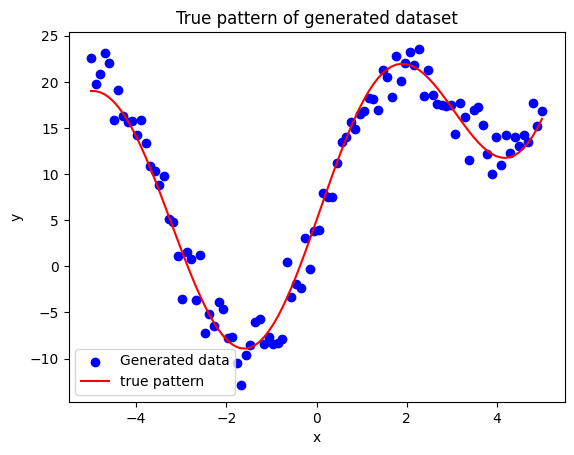

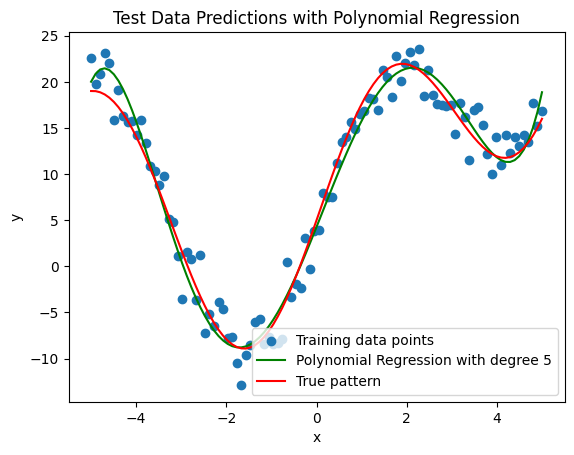

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# part(a)
np.random.seed(0)
n = 100
sigma = 2

x = np.linspace(-5,5,n)
y0 = 12*np.sin(x) + 0.5 * (x**2) + 2*x + 5
y = y0 + np.random.normal(0, sigma, n)

figure1 = plt.figure("Figure 1")
plt.scatter(x,y,c='blue', label = "Generated data")
plt.plot(x, y0, label = "true pattern", color='red')
plt.title("True pattern of generated dataset")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()

# part(b)
degree = 5
model = Pipeline([("Polynomial", PolynomialFeatures(degree = degree)), ("Linear Regression", LinearRegression())])

# part(c)
X = x[:,np.newaxis]
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
model.fit(x_train, y_train)
y1 = model.predict(x_test)

error = mean_squared_error(y_test, y1)
print("The mean squared error is: ", error)

# part(d)
figure2 = plt.figure("Figure 2")
plt.scatter(x, y, label='Training data points')
plt.plot(x, model.predict(X), label='Polynomial Regression with degree 5', color='green')
plt.plot(x, y0, label='True pattern', color='red')
plt.title("Test Data Predictions with Polynomial Regression")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

<div style="page-break-after: always;"></div>

### Problem 3

The best degree is:  7
The best test MSE is:  3.841846374683102


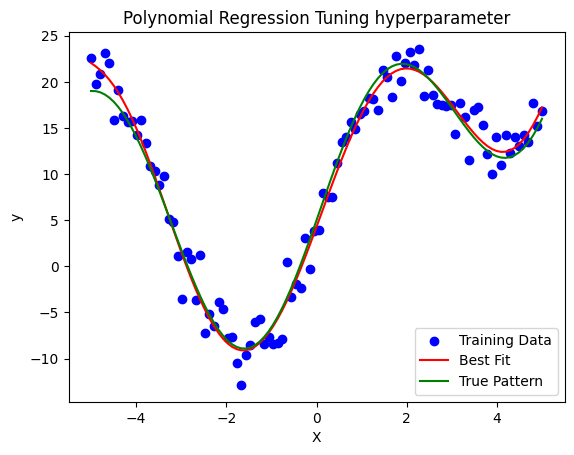

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error

# part(a)
model = Pipeline([
    ("Polynomial", PolynomialFeatures()), 
    ("Linear Regression", LinearRegression())
])

# part(b)
np.random.seed(0)
n = 100
sigma = 2
x = np.linspace(-5,5,n)
y0 = 12*np.sin(x) + 0.5 * (x**2) + 2*x + 5
y = y0 + np.random.normal(0, sigma, n)

X = x[:,np.newaxis]
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


param = {"Polynomial__degree": np.arange(1, 20)}
grid_search = GridSearchCV(model, param, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(x_train, y_train)
best_degree = grid_search.best_params_['Polynomial__degree']
best_model = grid_search.best_estimator_
y1 = best_model.predict(x_test)
best_mse = mean_squared_error(y_test, y1)

print("The best degree is: ", best_degree)
print("The best test MSE is: ", best_mse)

# part(c)
figure1 = plt.figure("Figure 1")
y1 = best_model.predict(X)
plt.title('Polynomial Regression Tuning hyperparameter')
plt.scatter(x, y, color='blue', label = 'Training Data')
plt.plot(x, y1, color='red', label = 'Best Fit')
plt.plot(x, y0, color='green', label = 'True Pattern')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

<div style="page-break-after: always;"></div>

### Problem 4

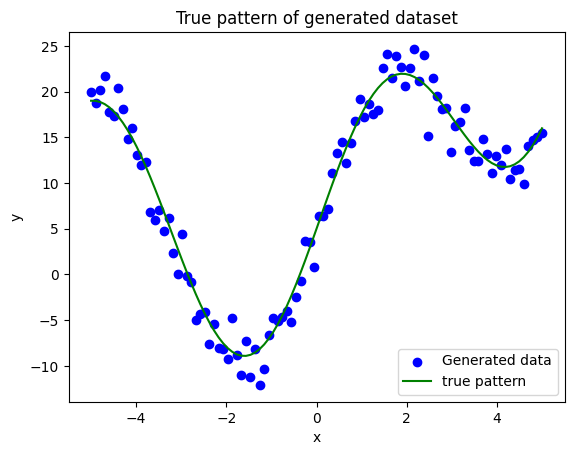

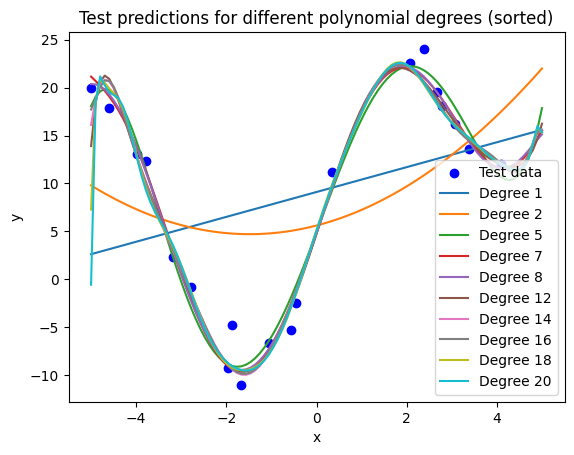

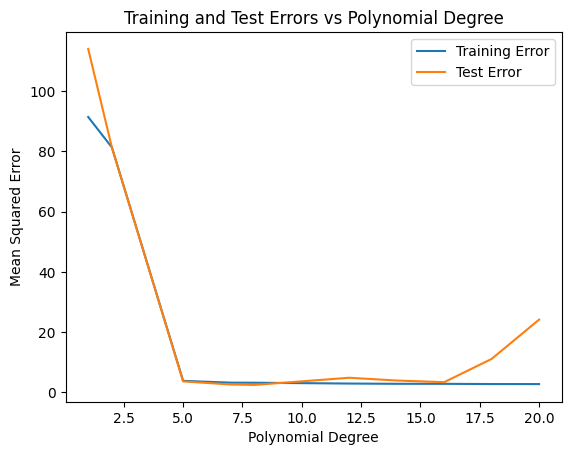

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# part(a)
np.random.seed(0)
n = 100
sigma = 2

x = np.linspace(-5,5,n)
y0 = 12*np.sin(x) + 0.5 * (x**2) + 2*x + 5
y = y0 + np.random.normal(0, sigma, n)

figure1 = plt.figure("Figure 1")
plt.scatter(x,y,c='blue', label = "Generated data")
plt.plot(x, y0, label = "true pattern", color='green')
plt.title("True pattern of generated dataset")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()

# part(b)
model = Pipeline([
    ("Polynomial", PolynomialFeatures()), 
    ("Linear Regression", LinearRegression())
])

# part(c)
X = x[:,np.newaxis]
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# part(d), (e)combined
degrees = [1, 2, 5, 7, 8, 12, 14, 16, 18, 20]
train_errors = []
test_errors = []

plt.figure("Figure 2")
plt.scatter(x_test, y_test, color="blue", label="Test data")

for degree in degrees:
    model.set_params(Polynomial__degree=degree)
    model.fit(x_train, y_train)
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    
    y_train_total = model.predict(X)
    plt.plot(x, y_train_total, label=f"Degree {degree}")
    
    train_errors.append(mean_squared_error(y_train, y_train_pred))
    test_errors.append(mean_squared_error(y_test, y_test_pred))

plt.title("Test predictions for different polynomial degrees (sorted)")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()

# part(f)
plt.figure("Figure 3")
plt.plot(degrees, train_errors, label="Training Error")
plt.plot(degrees, test_errors, label="Test Error")
plt.xlabel("Polynomial Degree")
plt.ylabel("Mean Squared Error")
plt.title("Training and Test Errors vs Polynomial Degree")
plt.legend()
plt.show()